# Shark Attack Database Mini Project

## Objective
<br>

* Organize and clean a csv data file.

* Detail and explain all python code and commands used in the importing, cleaning, manipulation, exporting and analysis.

<br>

database version: 7.1

# Starting the code

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Importing database

Importing a csv database using latin-1 encoding

In [2]:
# Importing csv database as "sharks"
sharks = pd.read_csv('attacks.csv', sep = ',', encoding='latin-1')

# Creating a backup copy
sharks_bkp = sharks.copy()

## Declaring functions

In [3]:
def standardize_headers(df, func=None):
    '''
    This functions works cleaning columns names:
    Replacing whitespaces, lower characteres and turning to string.
    '''
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    if func:
      df = df.apply(func)
    return df

def get_month(x):
    try:
        pattern = '-(\w+)-'
        x = ''.join(re.findall(pattern, x))
        if len(x) == 3:
            return x
        else: return x
    except:
        return x

## Data Cleaning

Starting by steps cleaning this database to improve quality and productivity. Cleaning all incorrect information, just leaving the highest quality info.

In [4]:
# Dataframe shape
sharks.shape

(25723, 24)

### Cleaning Columns
<br>

* Cleaning whitespaces

<br>

* Special characters

<br>

* Lower all characters. 

<br>


In [5]:
standardize_headers(sharks)
sharks.shape

(25723, 24)

In [6]:
sharks = sharks.rename(columns = {'sex_':'sex'})
sharks.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

### Checking Null and NaN

In [7]:
# Searching for NaN values
sharks.isna().sum()

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

In [8]:
# Searching for Null values
sharks.isnull().sum()

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

In [9]:
# Searching for duplicates rows
sharks.duplicated().sum()

19411

In [10]:
# Dropping duplicates
sharks = sharks.drop_duplicates()
sharks.isna().sum()

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal_(y/n)                549
time                      3364
species_                  2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number.1               10
case_number.2               10
original_order               3
unnamed:_22               6311
unnamed:_23               6310
dtype: int64

### Dropping column

#### Dropping two NaN columns 

<br>

For improve performance and having no useful data.

In [11]:
sharks = sharks.drop(axis = 1, columns = ['unnamed:_22', 'unnamed:_23'])

#### Drop original_order column

<br>

A column than was a Original index that is no longer useful.

In [12]:
sharks = sharks.drop(axis = 1, columns = ['original_order'])

In [13]:
sharks_case = sharks['case_number'] == sharks['case_number.1']
sharks_case.value_counts()

True     6278
False      34
dtype: int64

In [14]:
sharks_case = sharks['case_number.1'] == sharks['case_number.2']
sharks_case.value_counts()

True     6282
False      30
dtype: int64

In [15]:
sharks_href = sharks['href_formula'] == sharks['href']
sharks_case.value_counts()

True     6282
False      30
dtype: int64

### Drop duplicate column

<br>

* case_number.2 and case_number.1 was duplicate column of case_number


<br>

* href_formula was a duplicate column of href

<br>

In [16]:
sharks = sharks.drop(axis = 1, columns = ['case_number.1'])

In [17]:
sharks = sharks.drop(axis = 1, columns = ['case_number.2'])

In [18]:
sharks = sharks.drop(axis = 1, columns = ['href_formula'])

## Data Manipulation

### Cleaning country column

In [19]:
# Cleaning special characteres and lower.
for row in sharks['country']:
    if isinstance(row, str):
        new_row = re.sub('\/.+|\(.+\)|\.|\?', '', row)
        new_row = re.sub('\&', 'and', new_row.strip().lower())
        sharks['country'].replace(row,new_row, inplace=True)
    else:
        sharks['country'].replace(row,np.nan, inplace=True)

In [20]:
mask = sharks['country'] == 'between portugal and india'
sharks.loc[mask , :]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href
6170,1580.01.10.R,Letter dated 10-Jan-1580,1580.0,Unprovoked,between portugal and india,NaN,NaN,Man fell overboard from ship. Those on board t...,male,M,NaN,"FATAL. ""Shark tore him to pieces.",Y,NaN,NaN,"G.P. Whitley, p. 10",1580.01.10.R-Portugal-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


Filling NaN rows and correcting country name that are incorrectly

In [21]:
sharks['country'].fillna(value = 'unknown')

0              usa
1              usa
2              usa
3        australia
4           mexico
           ...    
6307       unknown
6308       unknown
6309       unknown
8702       unknown
25722      unknown
Name: country, Length: 6312, dtype: object

In [22]:
sharks['country'].value_counts(dropna=False)

usa                     2229
australia               1338
south africa             579
papua new guinea         134
new zealand              128
                        ... 
northern arabian sea       1
andaman islands            1
falkland islands           1
ireland                    1
admiralty islands          1
Name: country, Length: 192, dtype: int64

In [23]:
#Changing usa to united states
sharks['country'] = sharks['country'].str.replace('usa' , 'united states')

#Changing england to united kingdom
sharks['country'] = sharks['country'].str.replace('england' , 'united kingdom')

#Changing st helena.. to united kingdom
sharks['country'] = sharks['country'].str.replace('st helena, british overseas territory' , 'united kingdom')

#Changing columbia to colombia
sharks['country'] = sharks['country'].str.replace('columbia' , 'colombia')

#Changing british virgin islands to united kingdom
sharks['country'] = sharks['country'].str.replace('british virgin islands' , 'united kingdom')

#Changing diego garcia to united kingdom
sharks['country'] = sharks['country'].str.replace('diego garcia' , 'united kingdom')

#Changing british new guinea to united kingdom
sharks['country'] = sharks['country'].str.replace('british new guinea' , 'united kingdom')

In [24]:
sharks['country'].unique()

array(['united states', 'australia', 'mexico', 'brazil', 'united kingdom',
       'south africa', 'thailand', 'costa rica', 'maldives', 'bahamas',
       'new caledonia', 'ecuador', 'malaysia', 'libya', nan, 'cuba',
       'mauritius', 'new zealand', 'spain', 'samoa', 'solomon islands',
       'japan', 'egypt', 'comoros', 'reunion', 'french polynesia',
       'united arab emirates', 'philippines', 'indonesia', 'china',
       'colombia', 'cape verde', 'fiji', 'dominican republic',
       'cayman islands', 'aruba', 'mozambique', 'puerto rico', 'italy',
       'atlantic ocean', 'greece', 'st martin', 'france',
       'papua new guinea', 'trinidad and tobago', 'kiribati', 'israel',
       'taiwan', 'jamaica', 'palestinian territories', 'guam',
       'seychelles', 'belize', 'nigeria', 'tonga', 'scotland', 'canada',
       'croatia', 'saudi arabia', 'chile', 'antigua', 'kenya', 'russia',
       'turks and caicos', 'azores', 'south korea', 'malta', 'vietnam',
       'madagascar', 'panama', 

### Cleaning fatality column

In [25]:
sharks['fatal_(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [26]:
sharks = sharks.drop(786)

In [27]:
sharks['fatal_(y/n)'] = sharks['fatal_(y/n)'].apply(lambda x: str(x))
 # Can verify to see that dates prints out as an object

In [28]:
def cleaning_fatal(row):
    pattern = ' N|N '
    new_row = re.sub(pattern, 'N', row)
    return new_row
sharks['fatal_(y/n)'] = sharks['fatal_(y/n)'].apply(cleaning_fatal)

In [29]:
# Changing one row letter y to capitalize
sharks['fatal_(y/n)'] = sharks['fatal_(y/n)'].str.replace('y', 'Y')

# Changing one row letter M to letter N
sharks['fatal_(y/n)'] = sharks['fatal_(y/n)'].str.replace('M', 'N')

# Changing nan to Unknown
sharks['fatal_(y/n)'] = sharks['fatal_(y/n)'].str.replace('nan', 'UNKNOWN')

In [30]:
sharks['fatal_(y/n)'].value_counts()

N          4302
Y          1389
UNKNOWN     620
Name: fatal_(y/n), dtype: int64

### Cleaning sex column

In [31]:
#Verifying spaces M
mask_M = sharks['sex'] == 'M '
sharks.loc[mask_M , :]
#Cleaning spaces
sharks['sex'] = sharks['sex'].str.replace('M ', 'M')

In [32]:
#Verifying lli info
mask = sharks['sex'] == 'lli'
sharks.loc[mask , :]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,united states,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [33]:
#Changing lli to M
sharks['sex'] = sharks['sex'].str.replace('lli', 'M')

#Verifying N
mask_N_to_M = sharks['sex'] == 'N'
sharks.loc[mask_N_to_M , :]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href
4938,1934.07.11,11-Jul-1934,1934.0,Boating,australia,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [34]:
#Changing N to M
sharks['sex'] = sharks['sex'].str.replace('N' , 'M')

#Verifying dot(.)
mask_dot = sharks['sex'] == '.'
sharks.loc[mask_dot , :]

#dropping dot row
sharks = sharks.drop(axis = 0, index = [5437])

In [35]:
# Changing nan to Unknown group
sharks['sex'] = sharks['sex'].fillna(value = 'UNKNOWN')

## Data Export

In [36]:
sharks.to_csv('attacks_clean.csv', sep=',', index = False)

## Data Analysis

In [37]:
sharks_analysis = sharks[['year', 'country', 'sex', 'fatal_(y/n)']]

In [38]:
sharks_analysis.head(5)

,year,country,sex,fatal_(y/n)
0,2018.0,united states,F,N
1,2018.0,united states,F,N
2,2018.0,united states,M,N
3,2018.0,australia,M,N
4,2018.0,mexico,M,N


### Fatality by genre and country

#### Fatal by male and country

In [39]:
mask_year = sharks['year'] > 1900
sharks_year = sharks.loc[mask_year, :]
mask_fatal = sharks_year['fatal_(y/n)'] == 'Y'
sharks_fatal = sharks_year.loc[mask_fatal,:]
mask_genre = sharks_fatal['sex'] == 'M'
sharks_genre = sharks_fatal.loc[mask_genre, :]

In [40]:
sharks_group = sharks_genre.groupby(by = ['fatal_(y/n)', 'country', 'sex']).agg(genre_count = ('sex', 'count'))
sharks_group.sort_values(by = 'genre_count', ascending = False).head(5)

genre_count
fatal_(y/n) country          sex             
Y           australia        M            203
            united states    M            117
            south africa     M             80
            papua new guinea M             42
            brazil           M             28

##### Plotting

In [41]:
list(sharks_group.sort_values(by = 'genre_count', ascending = False).head(5).reset_index()['genre_count'])

[203, 117, 80, 42, 28]

In [42]:
australia_percent = (203/834)*100
united_states = (117/834)*100
south_africa = (80/834)*100
papua_new_guinea = (42/834)*100
brazil = (28/834)*100
others = ((834-470)/834)*100
print(australia_percent, united_states, south_africa, papua_new_guinea, brazil, others)

24.34052757793765 14.028776978417264 9.59232613908873 5.0359712230215825 3.357314148681055 43.645083932853716


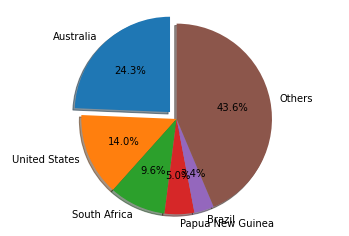

In [43]:
labels = 'Australia', 'United States', 'South Africa', 'Papua New Guinea', 'Brazil', 'Others'
sizes = [24.34, 14.03, 9.59, 5.03, 3.36, 43.64]
explode = (0.1, 0.0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### Fatal by female

In [44]:
mask_year = sharks['year'] > 1900
sharks_year = sharks.loc[mask_year, :]
mask_fatal = sharks_year['fatal_(y/n)'] == 'Y'
sharks_fatal = sharks_year.loc[mask_fatal,:]
mask_genre = sharks_fatal['sex'] == 'F'
sharks_genre = sharks_fatal.loc[mask_genre, :]

In [45]:
sharks_group = sharks_genre.groupby(by = ['fatal_(y/n)', 'country', 'sex']).agg(genre_count = ('sex', 'count'))
sharks_group.sort_values(by = 'genre_count', ascending = False).head(5)

genre_count
fatal_(y/n) country       sex             
Y           australia     F             14
            united states F             12
            croatia       F              7
            mexico        F              6
            south africa  F              5

##### Plotting

In [46]:
australia_percent_yf = (14/92)*100
united_states_yf = (12/92)*100
croatia_yf = (7/92)*100
mexico_yf = (6/92)*100
south_africa_yf = (5/92)*100
others_yf = ((92-44)/92)*100
print(australia_percent_yf, united_states_yf, croatia_yf, mexico_yf, south_africa_yf, others_yf)

15.217391304347828 13.043478260869565 7.608695652173914 6.521739130434782 5.434782608695652 52.17391304347826


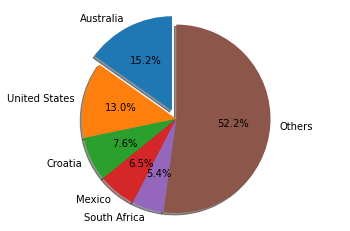

In [47]:
labels_yf = 'Australia', 'United States', 'Croatia', 'Mexico', 'South Africa', 'Others'
sizes_yf = [15.22, 13.04, 7.61, 6.52, 5.43, 52.17]
explode_yf = (0.1, 0.0, 0, 0, 0, 0)

fig2, ax2 = plt.subplots()
ax2.pie(sizes_yf, explode=explode_yf, labels=labels_yf, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

#### Non Fatal and Male

In [48]:
mask_year = sharks['year'] > 1900
sharks_year = sharks.loc[mask_year, :]
mask_fatal = sharks_year['fatal_(y/n)'] == 'N'
sharks_fatal = sharks_year.loc[mask_fatal,:]
mask_genre = sharks_fatal['sex'] == 'M'
sharks_genre = sharks_fatal.loc[mask_genre, :]

In [49]:
sharks_group = sharks_genre.groupby(by = ['fatal_(y/n)', 'country', 'sex']).agg(genre_count = ('sex', 'count'))
sharks_group.sort_values(by = 'genre_count', ascending = False).head(5)

genre_count
fatal_(y/n) country          sex             
N           united states    M           1404
            australia        M            688
            south africa     M            332
            bahamas          M             74
            papua new guinea M             61

##### Plotting

In [50]:
united_states_nm = (1404/3229)*100
australia_nm = (688/3229)*100
south_africa_nm = (332/3229)*100
bahamas_nm = (74/3229)*100
papua_new_guinea_nm = (61/3229)*100
others_nm = ((3229-2559)/3229)*100
print(united_states_nm, australia_nm, south_africa_nm, bahamas_nm, papua_new_guinea_nm, others_nm)

43.48095385568288 21.30690616289873 10.28182099721276 2.2917311861257357 1.8891297615360791 20.74945803654382


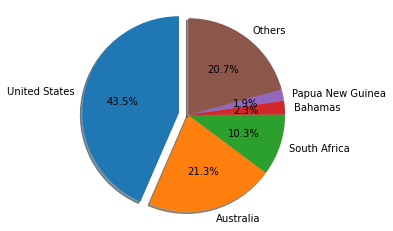

In [51]:
labels_nm = 'United States', 'Australia', 'South Africa', 'Bahamas', 'Papua New Guinea', 'Others'
sizes_nm = [43.48, 21.31, 10.28, 2.29, 1.89, 20.75]
explode_nm = (0.1, 0.0, 0, 0, 0, 0)

fig3, ax3 = plt.subplots()
ax3.pie(sizes_nm, explode=explode_nm, labels=labels_nm, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')

plt.show()

#### Non Fatal by Female

In [52]:
mask_year = sharks['year'] > 1900
sharks_year = sharks.loc[mask_year, :]
mask_fatal = sharks_year['fatal_(y/n)'] == 'N'
sharks_fatal = sharks_year.loc[mask_fatal,:]
mask_genre = sharks_fatal['sex'] == 'F'
sharks_genre = sharks_fatal.loc[mask_genre, :]

In [53]:
sharks_group = sharks_genre.groupby(by = ['fatal_(y/n)', 'country', 'sex']).agg(genre_count = ('sex', 'count'))
sharks_group.sort_values(by = 'genre_count', ascending = False).head(5)

genre_count
fatal_(y/n) country       sex             
N           united states F            287
            australia     F             58
            bahamas       F             14
            south africa  F             14
            new zealand   F             11

In [54]:
sharks_group['genre_count'].sum()

448

##### Plotting

In [55]:
united_states_nf = (287/448)*100
australia_nf = (58/448)*100
bahamas_nf = (14/448)*100
south_africa_nf = (14/448)*100
new_zealand_nf = (11/448)*100
others_nf = ((448-384)/448)*100
print(united_states_nf, australia_nf, bahamas_nf, south_africa_nf, new_zealand_nf, others_nf)

64.0625 12.946428571428573 3.125 3.125 2.455357142857143 14.285714285714285


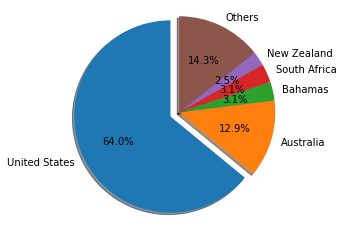

In [56]:
labels_nf = 'United States', 'Australia', 'Bahamas', 'South Africa', 'New Zealand', 'Others'
sizes_nf = [64.06, 12.95, 3.13, 3.13, 2.46, 14.29]
explode_nf = (0.1, 0.0, 0, 0, 0, 0)

fig4, ax4 = plt.subplots()
ax4.pie(sizes_nf, explode=explode_nf, labels=labels_nf, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')

plt.show()